<a href="https://colab.research.google.com/github/ShaominXu/Deep-Learning-Labs/blob/main/Improving%20the%20FashionMNIST%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt


# Training simple neural nets


In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

Let's now use the DataLoader object to spit out a few images from the dataset.

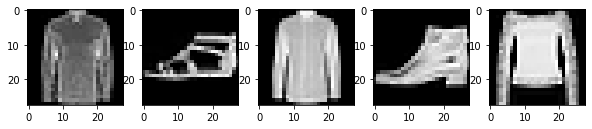

In [ ]:
images, labels = iter(trainDataLoader).next()

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [ ]:
from torch import nn
from torch.nn import NLLLoss
from torch.optim import SGD

#Network parameters

input_size = 784 #i.e 28*28*1
hidden_size = [256,128,64]
out_size = 10

model = nn.Sequential(
nn.Linear(input_size,hidden_size[0]),
nn.ReLU(),
nn.Linear(hidden_size[0],hidden_size[1]),
nn.ReLU(),
nn.Linear(hidden_size[1],hidden_size[2]),
nn.ReLU(),
nn.Linear(hidden_size[2],out_size),
nn.LogSoftmax(dim=1)
)

model = model.cuda()
Loss = NLLLoss()
optimizer = SGD(model.parameters(),lr=0.01)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


Cool! Everything is set up. Let's now train our network.

In [ ]:
train_loss_history = []
test_loss_history = []

for epoch in range(40):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.view(images.shape[0],-1) #sqash the image in to 784*1 vector

    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = model(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.view(images.shape[0],-1)
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model(images)
      images = images.view(images.shape[0],-1)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 1.933752083702128, Test loss 1.1290313085173345
Epoch 1, Train loss 0.8608085990968798, Test loss 0.7772116192207215
Epoch 2, Train loss 0.6842319166291752, Test loss 0.6718125677412483
Epoch 3, Train loss 0.6071509477426248, Test loss 0.6398555651591842
Epoch 4, Train loss 0.556720624409759, Test loss 0.5537670030715359
Epoch 5, Train loss 0.5199857631376558, Test loss 0.571636776825425
Epoch 6, Train loss 0.4920224001539796, Test loss 0.5158426123819534
Epoch 7, Train loss 0.46932023255301436, Test loss 0.4838029666311422
Epoch 8, Train loss 0.4505419122225949, Test loss 0.5074509257913395
Epoch 9, Train loss 0.43659383851264333, Test loss 0.4723256362281787
Epoch 10, Train loss 0.42404448576192105, Test loss 0.44294530115309794
Epoch 11, Train loss 0.4122301816844991, Test loss 0.43451430900081706
Epoch 12, Train loss 0.40328394052888283, Test loss 0.4420599207566802
Epoch 13, Train loss 0.39168267824184666, Test loss 0.41886197751874377
Epoch 14, Train loss 0.38

Let's see how we did! We have tracked the losses so let's plot it.

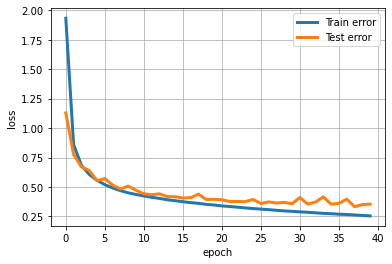

In [ ]:
plt.plot(range(40),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(40),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

Let's evaluate our final model on a few more images to wrap things up.

In [ ]:
import helper

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Test out your network!

dataiter = iter(testDataLoader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

model = model.cpu()

#turn off the gradients
with torch.no_grad():
  logps = model(img)
# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(logps)

# Plot the image and probabilities

print(logps)


tensor([[-10.7387, -11.4417, -10.6568,  -8.7661, -14.8958,  -4.3373, -11.7518,
          -3.0629,  -5.4415,  -0.0665]])


In [ ]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

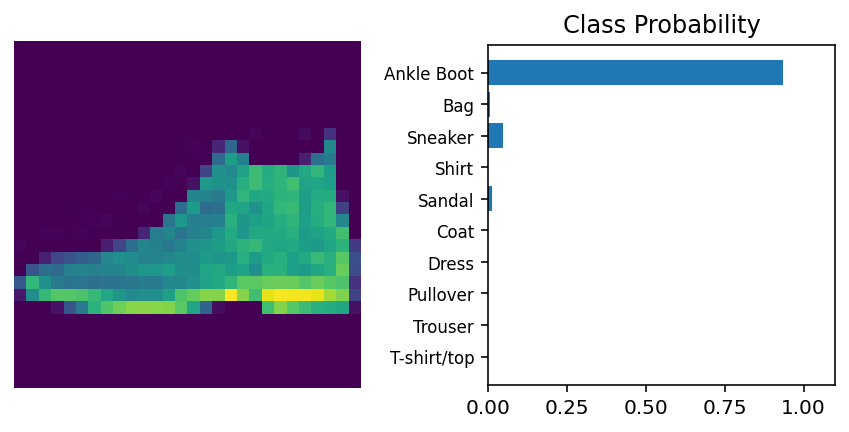

In [ ]:
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
